In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spatial_range = 0, 100
bins = 6

distance_bins = np.linspace(spatial_range[0], spatial_range[1], bins+1)
angle_bins = np.linspace(0, 2*np.pi, bins+1, endpoint=True)

In [28]:
# Generate random distances and angles
num_samples = 100  # Number of samples to generate
bias_distance = 50  # Introducing bias: center of the distance range for biasing
bias_angle = np.pi / 3  # Introducing bias: angle (in radians) towards which to bias

# Random distances with bias towards the middle of the range
random_distances = np.random.normal(loc=bias_distance, scale=10, size=num_samples)
random_distances = np.clip(random_distances, spatial_range[0], spatial_range[1])  # Clipping to keep within range

# Random angles with bias towards bias_angle
random_angles = np.random.vonmises(mu=bias_angle, kappa=1, size=num_samples)  # Higher kappa = stronger concentration/bias
random_angles = np.mod(random_angles, 2 * np.pi)  # Wrap-around any values outside 0 to 2*pi

distance_histogram, _ = np.histogram(random_distances, bins=distance_bins)
angle_histogram, _ = np.histogram(random_angles, bins=angle_bins)


In [29]:
angle_histogram

array([22, 35, 15,  7, 11, 10])

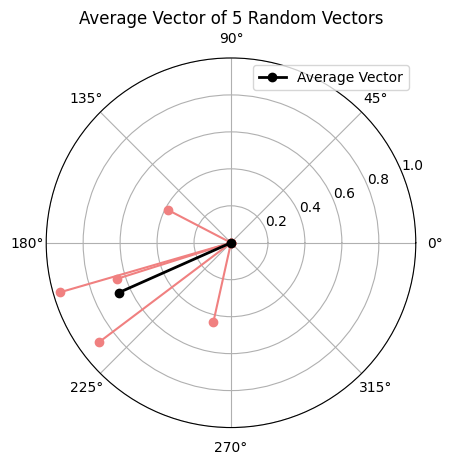

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Generating 5 random vectors
np.random.seed(0) # For reproducibility
angles = np.random.uniform(0, 2*np.pi, 5) # Random angles
lengths = np.random.uniform(0, 1, 5) # Random lengths

# Calculating the average vector
avg_angle = np.arctan2(np.sin(angles).mean(), np.cos(angles).mean())
avg_length = lengths.mean()

# Setting up the polar plot again
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plotting the individual vectors in pale red
for angle, length in zip(angles, lengths):
    ax.plot([0, angle], [0, length], marker='o', color='lightcoral')

# Plotting the average vector in black
ax.plot([0, avg_angle], [0, avg_length], marker='o', color='black', linewidth=2, label='Average Vector')

# Additional plot settings
ax.set_ylim(0, 1) # Setting the radial limit
ax.legend()
plt.title('Average Vector of 5 Random Vectors')

plt.show()

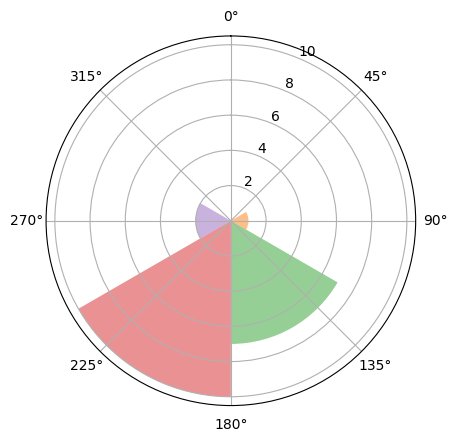

In [13]:
# Define your bins again for reference in the plot (same as before)
bins = 6
spatial_range = (0, 100)
angle_bins = np.linspace(0, 2 * np.pi, bins + 1, endpoint=True)

# Since we're plotting a histogram, we use the midpoints of the angle bins as the angles for plotting
angle_bin_midpoints = (angle_bins[:-1] + angle_bins[1:]) / 2

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot each segment with the radius determined by the distance histogram count
# The width of each bar is determined by the difference between the bins
for i in range(len(angle_bin_midpoints)):
    ax.bar(angle_bin_midpoints[i], distance_histogram[i], 
           width=angle_bins[1] - angle_bins[0], 
           bottom=0.0, 
           align='center', 
           alpha=0.5)

# Additional plot formatting
ax.set_theta_zero_location('N')  # Set 0 degrees at the top
ax.set_theta_direction(-1)  # Set the direction of increase to clockwise

# Display the plot
plt.show()

In [6]:
def plot_polar(results):
    """
    Plots the angles and distances from the results on a polar plot.

    Parameters:
    - results: A dictionary where each key is an identifier and each value is a dictionary 
               with 'angle' and 'distance' keys.
    """
    # Extracting angles and distances
    angles = [result['angle'] for result in results.values()]
    distances = [result['distance'] for result in results.values()]

    # Assuming angles are in radians. Uncomment and adjust if conversion is needed.
    # angles = np.radians(np.array(angles))

    # Create polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.scatter(angles, distances)

    # Display the plot
    plt.show()

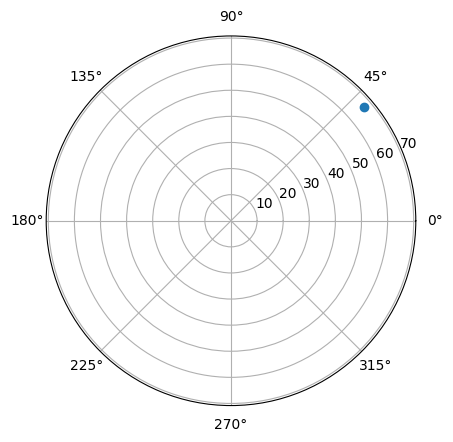

In [12]:
plot_polar({'1': {'angle': a, 'distance': d} for a, d in zip(random_angles, random_distances)})

In [ ]:
def compute_average_angle_from_histogram(angle_hist):
    bin_width = 360 / len(angle_hist)
    bin_midpoints = np.arange(0, 360, bin_width) + bin_width / 2
    bin_midpoints_radians = np.radians(bin_midpoints)

    x_components = angle_hist * np.cos(bin_midpoints_radians)
    y_components = angle_hist * np.sin(bin_midpoints_radians)

    x_mean = np.sum(x_components) / np.sum(angle_hist)
    y_mean = np.sum(y_components) / np.sum(angle_hist)

    # Compute the arctangent of the mean vector components to get the average angle in radians
    average_angle_radians = np.arctan2(y_mean, x_mean)

    # Normalize the average angle to be within 0 to 2*pi radians
    if average_angle_radians < 0:
        average_angle_radians += 2 * np.pi

    # Return the average angle in radians
    return average_angle_radians


# Function to take final histograms and calculate the average distance and angle for each event
def compute_average_distance_angle(final_histograms, bins=6):
    average_distances_angles = {}

    distance_midpoints = compute_bin_midpoints(np.linspace(82, 1092, bins+1))
    angle_midpoints = compute_bin_midpoints(np.linspace(0, 2*np.pi, bins+1))

    angle_midpoints_degrees = np.degrees(angle_midpoints)

    # print(angle_midpoints_degrees)

    for event_id, histograms in final_histograms.items():
        distance_hist = histograms['distance']
        angle_hist = histograms['angle']

        # Compute average distance
        distance_sum = np.sum(distance_hist * distance_midpoints)
        distance_count = np.sum(distance_hist)
        average_distance = distance_sum / distance_count if distance_count != 0 else 0

        # Compute average angle
        average_angle = compute_average_angle_from_histogram(angle_hist)

        # normalized_average_angle = average_angle % (2 * np.pi)

        average_distances_angles[event_id] = {'distance': average_distance, 'angle': average_angle}

    return average_distances_angles